In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import os

import numpy as np
import pandas as pd
from astropy.table import Table
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
# import holoviews as hv
# from holoviews.operation.datashader import datashade
# from holoviews import opts
# hv.extension('bokeh')


In [4]:
DATA_ROOT='/home/walml/repos/agnfinder/data'

In [5]:
!ls {DATA_ROOT}

cpz_maggie_kdes.pickle		  quasar_template_interpolated.dill
cpz_paper_sample_week3.parquet	  quasar_template_shang.txt
cubes				  selected_torus_template.csv
error_estimators.pickle		  smc_extinction_prevot_1984.dat
interpolated_smc_extinction.dill  torus_model_with_inclination.dill
lfi_test_case.json		  torus_template_interpolated.dill
photometry_quicksave.parquet


# Visualise Observed Galaxies

In [6]:
parquet_loc = os.path.join(DATA_ROOT, 'cpz_paper_sample_week3.parquet')

In [7]:
# save to parquet for quick reading, including of specific columns
if not os.path.isfile(parquet_loc):
    df = Table.read(os.path.join(DATA_ROOT, 'uK_IR_week3.fits')).to_pandas()
    df.replace(-99, np.nan, inplace=True)
    df.to_parquet(parquet_loc)

In [8]:
metadata_cols = ['id', 'alpha', 'delta', 'redshift', 'hclass', 'hquality',
       'survey_quality', 'survey_comment', 'sp_survey']

In [9]:
case_cols = ['CASE_I_a0_01', 'CASE_I_a0_001', 'CASE_I_a0', 'CASE_II_a0_05',
       'CASE_II_a0_01', 'CASE_II_a0_001', 'CASE_II_a0', 'CASE_II_b0_05',
       'CASE_II_b0_01', 'CASE_II_b0_001', 'CASE_II_b0', 'CASE_III_a0_05',
       'CASE_III_a0_01', 'CASE_III_a0_001', 'CASE_III_a0',
       'CASE_III_b0_05', 'CASE_III_b0_01', 'CASE_III_b0_001',
       'CASE_III_b0', 'CASE_III_c0_05', 'CASE_III_c0_01',
       'CASE_III_c0_001', 'CASE_III_c0', 'CASE_III_d0_05',
       'CASE_III_d0_01', 'CASE_III_d0_001', 'CASE_III_d0']

In [10]:
unified_cols = ['fuv', 'nuv',
       'u', 'g', 'r', 'i', 'z', 'y', 'j', 'h', 'k', 'w1', 'w2', 'w3',
       'w4', 'fuv3', 'nuv3', 'u3', 'g3', 'r3', 'i3', 'z3', 'y3', 'j3',
       'h3', 'k3', 'fuv_err', 'nuv_err', 'u_err', 'g_err', 'r_err',
       'i_err', 'z_err', 'y_err', 'j_err', 'h_err', 'k_err', 'w1_err',
       'w2_err', 'w3_err', 'w4_err', 'fuv3_err', 'nuv3_err', 'u3_err',
       'g3_err', 'r3_err', 'i3_err', 'z3_err', 'y3_err', 'j3_err',
       'h3_err', 'k3_err', 'u_hlr', 'g_hlr', 'r_hlr', 'i_hlr', 'z_hlr',
       'y_hlr', 'j_hlr', 'h_hlr', 'k_hlr']  # what is hlr?

In [11]:
sdss_cols = ['id_sdss_u_dr12',
       'tile_name_sdss_u_dr12', 'alpha_sdss_u_dr12', 'delta_sdss_u_dr12',
       'flags_sdss_u_dr12', 'flux_radius_sdss_u_dr12', 'fwhm_sdss_u_dr12',
       'mag_auto_sdss_u_dr12', 'magerr_auto_sdss_u_dr12',
       'mag_aper2_sdss_u_dr12', 'magerr_aper2_sdss_u_dr12',
       'mag_aper3_sdss_u_dr12', 'magerr_aper3_sdss_u_dr12',
       'id_sdss_g_dr12', 'tile_name_sdss_g_dr12', 'alpha_sdss_g_dr12',
       'delta_sdss_g_dr12', 'flags_sdss_g_dr12',
       'flux_radius_sdss_g_dr12', 'fwhm_sdss_g_dr12',
       'mag_auto_sdss_g_dr12', 'magerr_auto_sdss_g_dr12',
       'mag_aper2_sdss_g_dr12', 'magerr_aper2_sdss_g_dr12',
       'mag_aper3_sdss_g_dr12', 'magerr_aper3_sdss_g_dr12',
       'id_sdss_r_dr12', 'tile_name_sdss_r_dr12', 'alpha_sdss_r_dr12',
       'delta_sdss_r_dr12', 'flags_sdss_r_dr12',
       'flux_radius_sdss_r_dr12', 'fwhm_sdss_r_dr12',
       'mag_auto_sdss_r_dr12', 'magerr_auto_sdss_r_dr12',
       'mag_aper2_sdss_r_dr12', 'magerr_aper2_sdss_r_dr12',
       'mag_aper3_sdss_r_dr12', 'magerr_aper3_sdss_r_dr12',
       'id_sdss_i_dr12', 'tile_name_sdss_i_dr12', 'alpha_sdss_i_dr12',
       'delta_sdss_i_dr12', 'flags_sdss_i_dr12',
       'flux_radius_sdss_i_dr12', 'fwhm_sdss_i_dr12',
       'mag_auto_sdss_i_dr12', 'magerr_auto_sdss_i_dr12',
       'mag_aper2_sdss_i_dr12', 'magerr_aper2_sdss_i_dr12',
       'mag_aper3_sdss_i_dr12', 'magerr_aper3_sdss_i_dr12',
       'id_sdss_z_dr12', 'tile_name_sdss_z_dr12', 'alpha_sdss_z_dr12',
       'delta_sdss_z_dr12', 'flags_sdss_z_dr12',
       'flux_radius_sdss_z_dr12', 'fwhm_sdss_z_dr12',
       'mag_auto_sdss_z_dr12', 'magerr_auto_sdss_z_dr12',
       'mag_aper2_sdss_z_dr12', 'magerr_aper2_sdss_z_dr12',
       'mag_aper3_sdss_z_dr12', 'magerr_aper3_sdss_z_dr12']

### For convenience, define groups of columns

In [12]:
"""
Schema:
- IDENT: unique id?
- Z_BEST: best matching template from library
- Z_BEST68_{LOW}{HIGH}: solutions for 68% confidence (chi-squared = 1.0) in z likelihood from template
- Z_ML: "Zphot from Median of ML distribution"
- CHI_BEST: lowest chi-squared value from template fit
- MOD_BEST: index of best-fitting template?
- EXTLAW_BEST: index of best extinction law?
- EBV_BEST: Extinction value?
- MAG_ABS: Absolute magnitude (over all bands?) of best-fitting template?
- PDZ_BEST: Integrated template probability between z_best +/- 0.1(1+z)
- SCALE_BEST: "Scaling factor", presumably a free param. to scale the template from normalised form to match the observed mags.
- DIST_MOD_BEST: Distance modulus ('DM') of best-fitting template
Suffix: template library used
"""

template_cols_all_models = [
    'IDENT_ALL_MODELS', 'Z_BEST_ALL_MODELS', 'Z_BEST68_LOW_ALL_MODELS',
       'Z_BEST68_HIGH_ALL_MODELS', 'Z_ML_ALL_MODELS',
       'CHI_BEST_ALL_MODELS', 'MOD_BEST_ALL_MODELS',
       'EXTLAW_BEST_ALL_MODELS', 'EBV_BEST_ALL_MODELS',
       'MAG_ABS_BEST_ALL_MODELS', 'PDZ_BEST_ALL_MODELS',
       'SCALE_BEST_ALL_MODELS', 'DIST_MOD_BEST_ALL_MODELS',
       'NBAND_USED_ALL_MODELS', 'Z_SEC_ALL_MODELS', 'CHI_SEC_ALL_MODELS',
       'MOD_SEC_ALL_MODELS', 'MOD_STAR_ALL_MODELS', 'CHI_STAR_ALL_MODELS',
       'CONTEXT_ALL_MODELS', 'ZSPEC_ALL_MODELS']

template_cols_passive = [
    'IDENT_PASSIVE_pure',
       'Z_BEST_PASSIVE_pure', 'Z_BEST68_LOW_PASSIVE_pure',
       'Z_BEST68_HIGH_PASSIVE_pure', 'Z_ML_PASSIVE_pure',
       'CHI_BEST_PASSIVE_pure', 'MOD_BEST_PASSIVE_pure',
       'EXTLAW_BEST_PASSIVE_pure', 'EBV_BEST_PASSIVE_pure',
       'MAG_ABS_BEST_PASSIVE_pure', 'PDZ_BEST_PASSIVE_pure',
       'SCALE_BEST_PASSIVE_pure', 'DIST_MOD_BEST_PASSIVE_pure',
       'NBAND_USED_PASSIVE_pure', 'Z_SEC_PASSIVE_pure',
       'CHI_SEC_PASSIVE_pure', 'MOD_SEC_PASSIVE_pure',
       'MOD_STAR_PASSIVE_pure', 'CHI_STAR_PASSIVE_pure',
       'CONTEXT_PASSIVE_pure', 'ZSPEC_PASSIVE_pure']

template_cols_starforming = [
       'IDENT_STARFORMING_pure', 'Z_BEST_STARFORMING_pure',
       'Z_BEST68_LOW_STARFORMING_pure', 'Z_BEST68_HIGH_STARFORMING_pure',
       'Z_ML_STARFORMING_pure', 'CHI_BEST_STARFORMING_pure',
       'MOD_BEST_STARFORMING_pure', 'EXTLAW_BEST_STARFORMING_pure',
       'EBV_BEST_STARFORMING_pure', 'MAG_ABS_BEST_STARFORMING_pure',
       'PDZ_BEST_STARFORMING_pure', 'SCALE_BEST_STARFORMING_pure',
       'DIST_MOD_BEST_STARFORMING_pure', 'NBAND_USED_STARFORMING_pure',
       'Z_SEC_STARFORMING_pure', 'CHI_SEC_STARFORMING_pure',
       'MOD_SEC_STARFORMING_pure', 'MOD_STAR_STARFORMING_pure',
       'CHI_STAR_STARFORMING_pure', 'CONTEXT_STARFORMING_pure',
       'ZSPEC_STARFORMING_pure']

template_cols_extreme_starforming = [
    'IDENT_EXTREME_STARFORMING_pure',
       'Z_BEST_EXTREME_STARFORMING_pure',
       'Z_BEST68_LOW_EXTREME_STARFORMING_pure',
       'Z_BEST68_HIGH_EXTREME_STARFORMING_pure',
       'Z_ML_EXTREME_STARFORMING_pure',
       'CHI_BEST_EXTREME_STARFORMING_pure',
       'MOD_BEST_EXTREME_STARFORMING_pure',
       'EXTLAW_BEST_EXTREME_STARFORMING_pure',
       'EBV_BEST_EXTREME_STARFORMING_pure',
       'MAG_ABS_BEST_EXTREME_STARFORMING_pure',
       'PDZ_BEST_EXTREME_STARFORMING_pure',
       'SCALE_BEST_EXTREME_STARFORMING_pure',
       'DIST_MOD_BEST_EXTREME_STARFORMING_pure',
       'NBAND_USED_EXTREME_STARFORMING_pure',
       'Z_SEC_EXTREME_STARFORMING_pure',
       'CHI_SEC_EXTREME_STARFORMING_pure',
       'MOD_SEC_EXTREME_STARFORMING_pure',
       'MOD_STAR_EXTREME_STARFORMING_pure',
       'CHI_STAR_EXTREME_STARFORMING_pure',
       'CONTEXT_EXTREME_STARFORMING_pure',
       'ZSPEC_EXTREME_STARFORMING_pure']

template_cols_agn = ['IDENT_AGN_pure',
       'Z_BEST_AGN_pure', 'Z_BEST68_LOW_AGN_pure',
       'Z_BEST68_HIGH_AGN_pure', 'Z_ML_AGN_pure', 'CHI_BEST_AGN_pure',
       'MOD_BEST_AGN_pure', 'EXTLAW_BEST_AGN_pure', 'EBV_BEST_AGN_pure',
       'MAG_ABS_BEST_AGN_pure', 'PDZ_BEST_AGN_pure',
       'SCALE_BEST_AGN_pure', 'DIST_MOD_BEST_AGN_pure',
       'NBAND_USED_AGN_pure', 'Z_SEC_AGN_pure', 'CHI_SEC_AGN_pure',
       'MOD_SEC_AGN_pure', 'MOD_STAR_AGN_pure', 'CHI_STAR_AGN_pure',
       'CONTEXT_AGN_pure', 'ZSPEC_AGN_pure']

template_cols_qso_pure = ['IDENT_QSO_pure',
       'Z_BEST_QSO_pure', 'Z_BEST68_LOW_QSO_pure',
       'Z_BEST68_HIGH_QSO_pure', 'Z_ML_QSO_pure', 'CHI_BEST_QSO_pure',
       'MOD_BEST_QSO_pure', 'EXTLAW_BEST_QSO_pure', 'EBV_BEST_QSO_pure',
       'MAG_ABS_BEST_QSO_pure', 'PDZ_BEST_QSO_pure',
       'SCALE_BEST_QSO_pure', 'DIST_MOD_BEST_QSO_pure',
       'NBAND_USED_QSO_pure', 'Z_SEC_QSO_pure', 'CHI_SEC_QSO_pure',
       'MOD_SEC_QSO_pure', 'MOD_STAR_QSO_pure', 'CHI_STAR_QSO_pure',
       'CONTEXT_QSO_pure', 'ZSPEC_QSO_pure']

template_cols_star = ['IDENT_STAR', 'Z_BEST_STAR',
       'Z_BEST68_LOW_STAR', 'Z_BEST68_HIGH_STAR', 'Z_ML_STAR',
       'CHI_BEST_STAR', 'MOD_BEST_STAR', 'EXTLAW_BEST_STAR',
       'EBV_BEST_STAR', 'MAG_ABS_BEST_STAR', 'PDZ_BEST_STAR',
       'SCALE_BEST_STAR', 'DIST_MOD_BEST_STAR', 'NBAND_USED_STAR',
       'Z_SEC_STAR', 'CHI_SEC_STAR', 'MOD_SEC_STAR', 'MOD_STAR_STAR',
       'CHI_STAR_STAR', 'CONTEXT_STAR', 'ZSPEC_STAR']

template_cols_galaxies = ['IDENT_GALAXIES',
       'Z_BEST_GALAXIES', 'Z_BEST68_LOW_GALAXIES',
       'Z_BEST68_HIGH_GALAXIES', 'Z_ML_GALAXIES', 'CHI_BEST_GALAXIES',
       'MOD_BEST_GALAXIES', 'EXTLAW_BEST_GALAXIES', 'EBV_BEST_GALAXIES',
       'MAG_ABS_BEST_GALAXIES', 'PDZ_BEST_GALAXIES',
       'SCALE_BEST_GALAXIES', 'DIST_MOD_BEST_GALAXIES',
       'NBAND_USED_GALAXIES', 'Z_SEC_GALAXIES', 'CHI_SEC_GALAXIES',
       'MOD_SEC_GALAXIES', 'MOD_STAR_GALAXIES', 'CHI_STAR_GALAXIES',
       'CONTEXT_GALAXIES', 'ZSPEC_GALAXIES']

template_cols_agn = ['IDENT_AGN', 'Z_BEST_AGN',
       'Z_BEST68_LOW_AGN', 'Z_BEST68_HIGH_AGN', 'Z_ML_AGN',
       'CHI_BEST_AGN', 'MOD_BEST_AGN', 'EXTLAW_BEST_AGN', 'EBV_BEST_AGN',
       'MAG_ABS_BEST_AGN', 'PDZ_BEST_AGN', 'SCALE_BEST_AGN',
       'DIST_MOD_BEST_AGN', 'NBAND_USED_AGN', 'Z_SEC_AGN', 'CHI_SEC_AGN',
       'MOD_SEC_AGN', 'MOD_STAR_AGN', 'CHI_STAR_AGN', 'CONTEXT_AGN',
       'ZSPEC_AGN']

# what's the difference between these and qso_pure?
template_cols_qso_impure = ['IDENT_QSO', 'Z_BEST_QSO', 'Z_BEST68_LOW_QSO',
       'Z_BEST68_HIGH_QSO', 'Z_ML_QSO', 'CHI_BEST_QSO', 'MOD_BEST_QSO',
       'EXTLAW_BEST_QSO', 'EBV_BEST_QSO', 'MAG_ABS_BEST_QSO',
       'PDZ_BEST_QSO', 'SCALE_BEST_QSO', 'DIST_MOD_BEST_QSO',
       'NBAND_USED_QSO', 'Z_SEC_QSO', 'CHI_SEC_QSO', 'MOD_SEC_QSO',
       'MOD_STAR_QSO', 'CHI_STAR_QSO', 'CONTEXT_QSO', 'ZSPEC_QSO']

# what's the difference betwen these and STARFORMING?
template_cols_starforming_v2 = [
       'IDENT_starforming', 'Z_BEST_starforming',
       'Z_BEST68_LOW_starforming', 'Z_BEST68_HIGH_starforming',
       'Z_ML_starforming', 'CHI_BEST_starforming', 'MOD_BEST_starforming',
       'EXTLAW_BEST_starforming', 'EBV_BEST_starforming',
       'MAG_ABS_BEST_starforming', 'PDZ_BEST_starforming',
       'SCALE_BEST_starforming', 'DIST_MOD_BEST_starforming',
       'NBAND_USED_starforming', 'Z_SEC_starforming',
       'CHI_SEC_starforming', 'MOD_SEC_starforming',
       'MOD_STAR_starforming', 'CHI_STAR_starforming',
       'CONTEXT_starforming', 'ZSPEC_starforming']

z_errors_vs_spectro = ['Dz_ALL_MODELS',
       'Dz_GALAXIES', 'Dz_AGN', 'Dz_QSO', 'Dz_PASSIVE_pure',
       'Dz_STARFORMING_pure', 'Dz_EXTREME_STARFORMING_pure',
       'Dz_starforming', 'Dz_AGN_pure']

In [13]:
# df = pd.read_parquet(parquet_loc, columns=metadata_cols + unified_cols)
df = pd.read_parquet(parquet_loc)

In [14]:
# df.columns.values

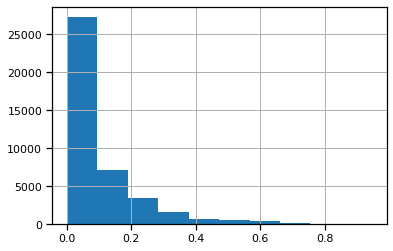

In [15]:
df['Pr[agn]_case_III'].hist()

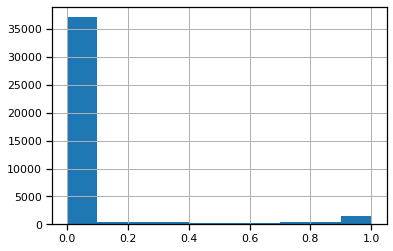

In [16]:
df['Pr[qso]_case_III'].hist()

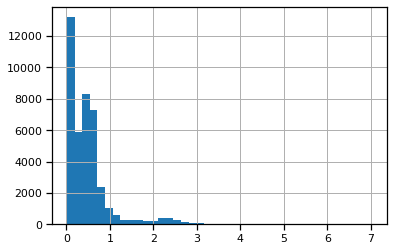

In [17]:
df['redshift'].hist(bins=40)

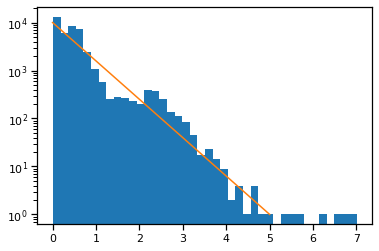

In [18]:
plt.hist(df['redshift'], bins=40)
plt.yscale('log')
x = np.linspace(0., 5.)
y = 10 ** (4 + x * -.8)  # this is a pretty good fit to the actual observed redshift distribution
plt.plot(x, y)
# hence I can use as a prior for z: 0->1 linear hcube space = 10 ** (4 + x * 5 * -.8) real space
# not super important because I don't actually do inference on z, but hcube should have samples in prop. to real galaxies
# or should it have samples in prop. to deviations??

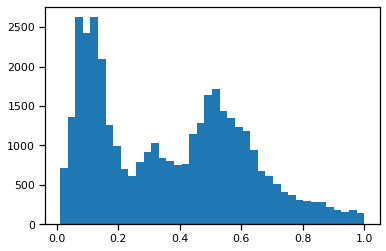

In [20]:
_ = plt.hist(df.query('redshift < 1.')['redshift'], bins=40)

Vast majority of galaxies are z < 1, so should make another z < 1 hypercube

In [18]:
df['hclass'].value_counts()  # need to review what this means

-1    25343
 1    11369
 3     4192
 2      495
Name: hclass, dtype: int64

In [19]:
df['hquality'].value_counts()  # hquality is always 1

1    41399
Name: hquality, dtype: int64

In [20]:
df['sp_survey'].value_counts()  # origin of the spectro. data. Vast majority is SDSS DR12.

b'sdss_dr12  '    25274
b'gama_dr2   '     7659
b'primus_dr1 '     7101
b'vipers_dr1 '      962
b'vvds_dr2   '      340
b'sixdf_dr3  '       62
b'mosdef_dr2 '        1
Name: sp_survey, dtype: int64

In [21]:
df[unified_cols].describe()

,fuv,nuv,u,g,r,i,z,y,j,h,...,k3_err,u_hlr,g_hlr,r_hlr,i_hlr,z_hlr,y_hlr,j_hlr,h_hlr,k_hlr
count,10240.000000,17732.000000,41399.000000,41399.000000,41399.000000,41399.000000,41399.000000,41399.000000,41399.000000,41399.000000,...,41399.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,36363.000000,39768.000000,40983.000000,40009.000000
mean,21.560394,21.423619,21.687382,20.288376,19.202107,18.596229,18.472280,18.274252,18.093954,17.816983,...,0.060507,5.868006,5.257511,4.948954,4.700487,4.673373,25.916068,80.938465,48.114994,33.349656
std,1.636024,1.691672,2.204317,2.169557,1.954786,1.773346,1.678191,1.637406,1.608746,1.569241,...,0.064056,3.418669,2.858248,2.698218,2.461010,4.338987,1660.781362,5310.627656,2647.644622,2768.865999
min,12.798434,13.534887,14.251177,12.451159,11.549284,11.126833,11.208169,11.035035,10.942085,10.770092,...,0.001862,0.000000,0.000000,1.920000,0.000000,0.000000,0.341085,0.232718,0.272109,0.305205
25%,20.323385,20.001158,19.800167,18.309650,17.461829,17.053258,17.008716,16.850739,16.708279,16.497114,...,0.018023,4.057000,3.809000,3.622000,3.455000,3.418000,0.864146,0.790583,0.765232,0.728141
50%,21.362516,21.485997,21.833473,20.522735,19.381745,18.829380,18.755980,18.577396,18.371309,18.039601,...,0.042218,5.199000,4.709000,4.451000,4.231000,4.193000,1.120524,0.954451,0.932094,0.902163
75%,22.811033,22.765458,23.288676,21.986391,20.602543,19.796252,19.628734,19.388950,19.193437,18.887028,...,0.073617,6.816000,5.986000,5.621000,5.329000,5.261000,1.645075,1.409331,1.362696,1.306205
max,25.914642,25.874866,31.906898,36.653717,25.110439,36.184838,23.480027,22.858922,22.694675,22.810637,...,0.886147,126.892998,130.524994,123.132004,115.106003,382.864990,158556.162798,597017.025660,294001.013625,435077.487900


In [22]:
df = pd.read_parquet(parquet_loc, columns=metadata_cols+z_errors_vs_spectro+template_cols_all_models)

In [23]:
len(df.query('Z_BEST_ALL_MODELS < 0')) # df has an outlier

0

In [24]:
df = df[df['Z_BEST_ALL_MODELS'] > 0]

(0.0, 2.5)

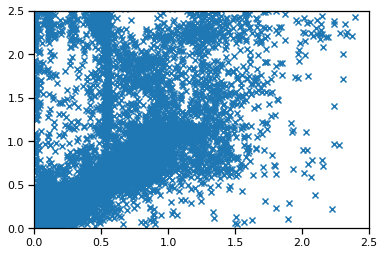

In [25]:
plt.scatter(df['Z_BEST_ALL_MODELS'], df['redshift'], marker='x')
plt.xlim([0., 2.5])
plt.ylim([0., 2.5])

(0.0, 2.5)

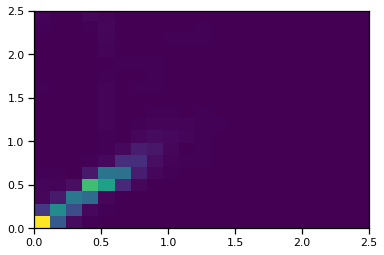

In [26]:
plt.hist2d(df['Z_BEST_ALL_MODELS'], df['redshift'], bins=(50, 50))
plt.xlim([0., 2.5])
plt.ylim([0., 2.5])

Those weren't very helpful...let's try something more serious....

In [ ]:
points = datashade(hv.Scatter(df, 'Z_BEST_ALL_MODELS', 'redshift',label="Points")).opts(height=800, width=800, xlim=(0., 2.5), ylim=(0., 2.5))
points

Some interesting artifacts from the 'all models' template fitting configuration:
- many galaxies at all redshifts being placed at z=0.5, especially the highest redshift sources
- some galaxies at all redshifts being placed at z=0
- redshifts below z=1 seem far better than above z=1

In [ ]:
# what does this column mean? If it means the row index of the best-fitting model, how do I work that back to the model itself?
df['MOD_BEST_ALL_MODELS'].value_counts()

In [ ]:
df[template_cols_all_models].iloc[54]

### TODO break down by best-fitting class to see what's going on with the template artifacts above